# REVIEW 1 NOTEBOOK

## IMAGE DATA

In [1]:
# all import statements
import numpy as np
import pandas as pd
import pydicom as pyd
import os
import matplotlib.pyplot as plt
import mudicom

from os.path import dirname, join
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir
from PIL import Image


Path to folder containing all the dicom aka ".dcm" files

In [2]:
PATH = 'data/stage_2_train_images/'

### GET LIST

Get all the file paths inside a list

In [3]:
lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

### TRY 40 images a minibatch

In [4]:
dcm_40 = []
for img in range(40):
    dcm_40.append(lstFilesDCM[img])

Here we will get the pixel data from every dicom file in our list of 40 dicom files

In [5]:
dcm_np = []
pat_ids = []
for dcm in dcm_40:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mudicom.load(dcm)
    img = img.image
    img = img.numpy
    dcm_np.append(img)


In [6]:
len(dcm_np), len(pat_ids)

(40, 40)

### CHECK FOR NUMPY ARRAY

In [7]:
dcm_np[1] #pixel array

array([[255., 255., 255., ..., 255., 254., 138.],
       [255., 254., 253., ..., 255., 255., 139.],
       [255., 255., 254., ..., 255., 255., 139.],
       ...,
       [ 16.,  15.,  15., ...,  18.,  10.,   0.],
       [ 16.,  16.,  15., ...,  18.,  10.,   0.],
       [ 16.,  16.,  15., ...,  18.,  10.,   0.]])

### MEAN AND STANDARD DEVIATION

In [8]:
mean = 0
std = 0
for data in dcm_np:
    mean += data.mean()
    std += data.std()

In [9]:
mean, std

(4874.466063499451, 2227.5475878644684)

# PLOTS

## HELPER METHODS

In [10]:
def show(img, title=None):
    plt.imshow(img, cmap=plt.cm.bone)
    if title is not None: plt.title = title

In [11]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap=plt.cm.bone)

## SHOW IMAGES

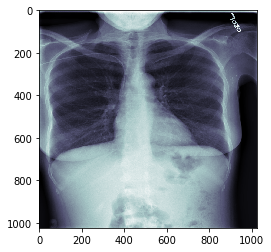

In [12]:
show(dcm_np[1], pat_ids[1])

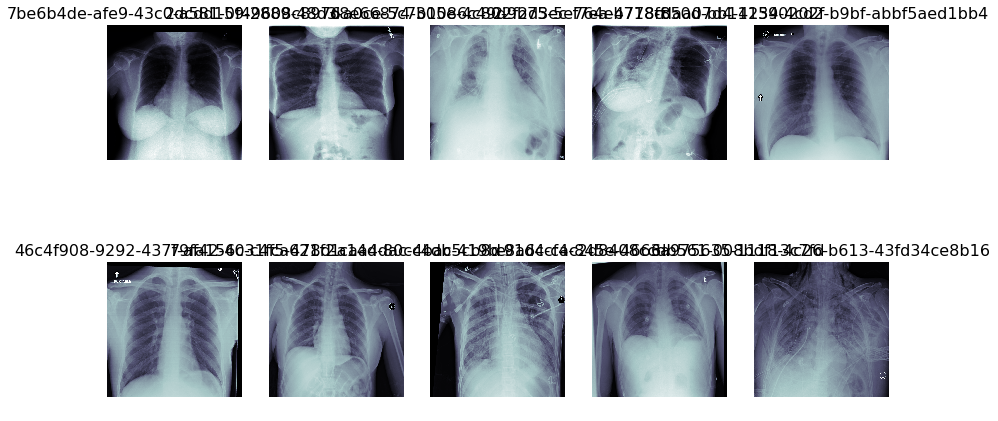

In [13]:
plots(dcm_np[:10], figsize=(14, 8), titles=pat_ids[:10])

# LABELS

In [14]:
labels_data = pd.read_csv('data/stage_2_train_labels.csv')

In [15]:
labels_data.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


## Check the target

In [71]:
labels_patID = labels_data.patientId.values.tolist()

In [72]:
labels_target = labels_data.Target.values.tolist()

In [73]:
labels_x = labels_data.x.values.tolist()

In [74]:
labels_y = labels_data.y.values.tolist()

In [75]:
dcm_np_target = []
dcm_np_x = []
dcm_np_y = []
for data in pat_ids:
    if data in labels_patID:
        idx = labels_patID.index(data)
        dcm_np_target.append(labels_target[idx])
        dcm_np_x.append(labels_x[idx])
        dcm_np_y.append(labels_y[idx])

In [19]:
len(dcm_np_target)

40

## Plots with target labels

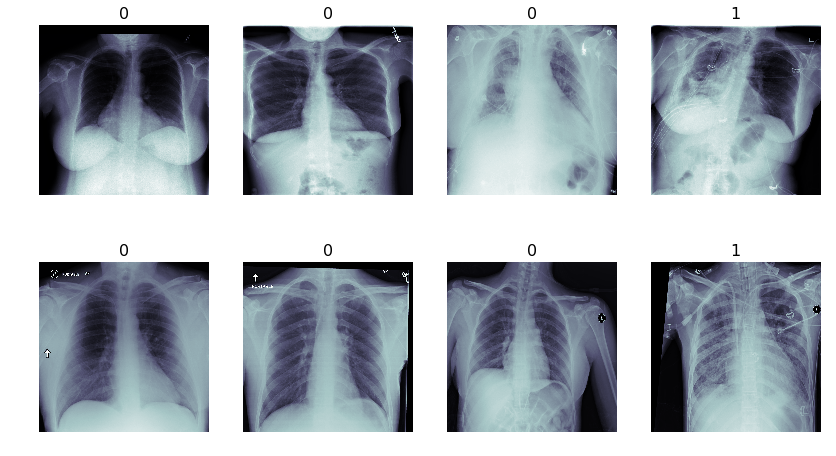

In [20]:
plots(dcm_np[:8], figsize=(14,8), titles=dcm_np_target[:8])

# Patient ID Class INFO

In [21]:
class_info = pd.read_csv('data/stage_2_detailed_class_info.csv')
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


## Convert class labels to categories

In [22]:
class_info['class'] = class_info['class'].astype('category'); class_info['class'].head

<bound method NDFrame.head of 0        No Lung Opacity / Not Normal
1        No Lung Opacity / Not Normal
2        No Lung Opacity / Not Normal
3                              Normal
4                        Lung Opacity
5                        Lung Opacity
6        No Lung Opacity / Not Normal
7        No Lung Opacity / Not Normal
8                        Lung Opacity
9                        Lung Opacity
10       No Lung Opacity / Not Normal
11                             Normal
12                             Normal
13                             Normal
14                       Lung Opacity
15                       Lung Opacity
16                       Lung Opacity
17                       Lung Opacity
18       No Lung Opacity / Not Normal
19                       Lung Opacity
20                       Lung Opacity
21                             Normal
22                       Lung Opacity
23                             Normal
24                       Lung Opacity
25                  

## Apply category codes (0, 1, 2)

Here we have three categories,
1. Lung Opacity --> 0
2. No Lung Opacity / Not Normal --> 1
3. Normal --> 2

In [23]:
class_info['class'] = class_info['class'].cat.codes

In [24]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,2
4,00436515-870c-4b36-a041-de91049b9ab4,0


## Get the indices

In [25]:
class_info_patID = class_info.patientId.values.tolist()
class_info_class = class_info['class'].values.tolist()

In [26]:
len(class_info_patID), len(class_info_class)

(30227, 30227)

In [27]:
_classes = []
for data in pat_ids:
    if data in class_info_patID:
        idx = class_info_patID.index(data)
        _classes.append(class_info_class[idx])
        

In [28]:
len(_classes), _classes[:8]

(40, [2, 2, 1, 0, 2, 2, 2, 0])

## Plots with classes

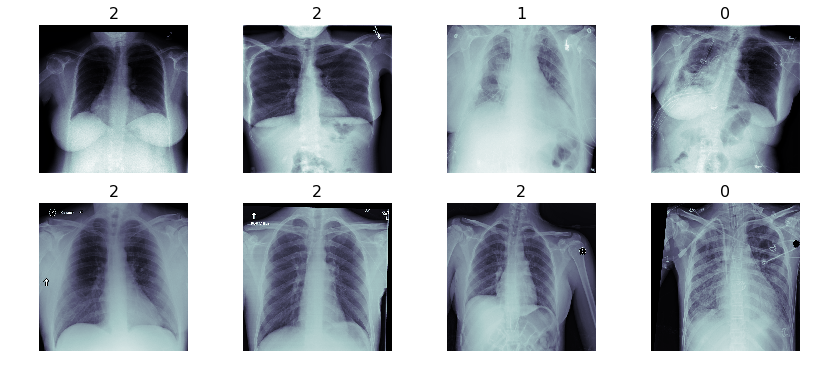

In [29]:
plots(dcm_np[:8], figsize=(14, 6), titles=( _classes[:8]))

In [30]:
from sklearn import decomposition

In [31]:
# u, s, v = decomposition.randomized_svd(M, 2)

In [98]:
M = dcm_np[1]

In [99]:
M.shape

(1024, 1024)

In [100]:
u, s, v = decomposition.randomized_svd(M, 2)

In [101]:
u, s, v

(array([[ 0.05588554,  0.02098981],
        [ 0.05539846,  0.02069559],
        [ 0.05478285,  0.02056718],
        ...,
        [ 0.0387265 , -0.03513339],
        [ 0.03902666, -0.0350769 ],
        [ 0.03932641, -0.03528198]]),
 array([128584.06050018,  33379.44136615]),
 array([[0.0219582 , 0.02147211, 0.02098645, ..., 0.0081892 , 0.00670215,
         0.0029785 ],
        [0.09281049, 0.09090283, 0.0888488 , ..., 0.02449338, 0.02659377,
         0.01426275]]))

In [102]:
u.shape, v.shape, s.shape

((1024, 2), (2, 1024), (2,))

In [103]:
type(M)

numpy.ndarray

In [104]:
type(u)

numpy.ndarray

In [105]:
low_rank1 = u @ np.diag(s) @ v

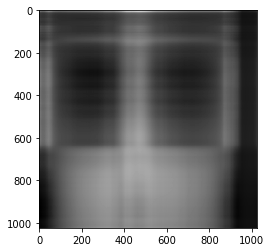

In [106]:
plt.imshow(low_rank1, cmap='gray')

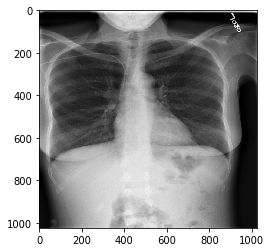

In [49]:
plt.imshow(M, cmap='gray')

In [51]:
_classes[1]

2

In [52]:
dcm_np_target[1]

0

In [54]:
dcm_np_target[3]

1

In [55]:
M2 = dcm_np[3]


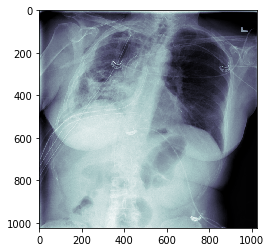

In [56]:
show(M2, (dcm_np_target[3], _classes[3]))

In [57]:
u, s, v = decomposition.randomized_svd(M2, 2)

In [58]:
low_rank = u @ np.diag(s) @ v

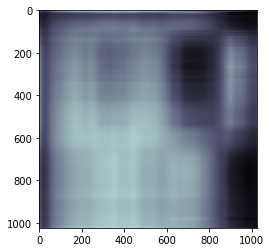

In [59]:
show(low_rank)

In [76]:
dcm_np_x[1], dcm_np_y[1]

(nan, nan)

In [77]:
dcm_np_x[3], dcm_np_y[3]

(213.0, 321.0)

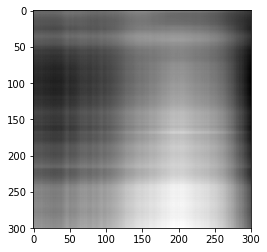

In [92]:
plt.imshow((low_rank[100:400, 300:600]), cmap='gray')

In [95]:
low_rank[100:400, 300:600].shape

(300, 300)

In [96]:
xx = low_rank.std()

In [97]:
xx

63.0129486465097

In [107]:
yy = low_rank1.std(); yy

62.884956619067665

In [108]:
import matplotlib.patches as patches

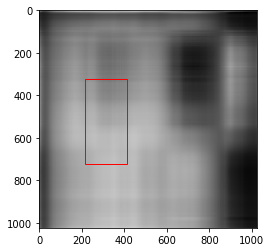

In [122]:
im = low_rank

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im, cmap = 'gray')

# Create a Rectangle patch
rect = patches.Rectangle((213,321),200,400,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()